In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## Observações

891 linhas, 12 colunas <br><br>

1) checar para dados vazios ou não numéricos (isnull() e isna())<br>
- idade 177 nas <br>
- cabine 687 nas <br>
<br>

2) preencher os dados vazios (idade e cabine) <br>
- idade - preencher com média (semelhante a mediana)
- cabine - preenchidos com 0
- porto - preenchidos com ffill

In [4]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

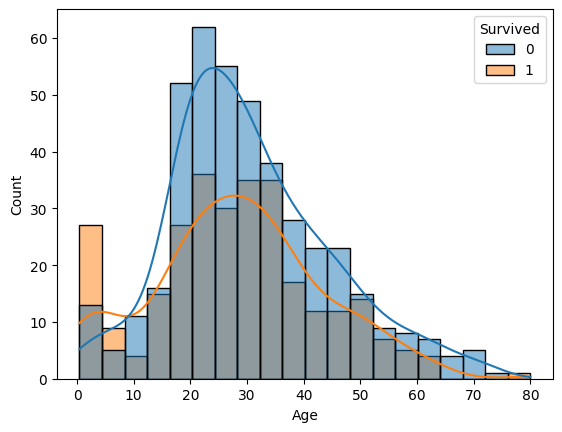

In [5]:
import seaborn as sns

ax = sns.histplot(data= train_data, x = 'Age', kde = True, stat='count', hue = 'Survived')
ax

<Axes: >

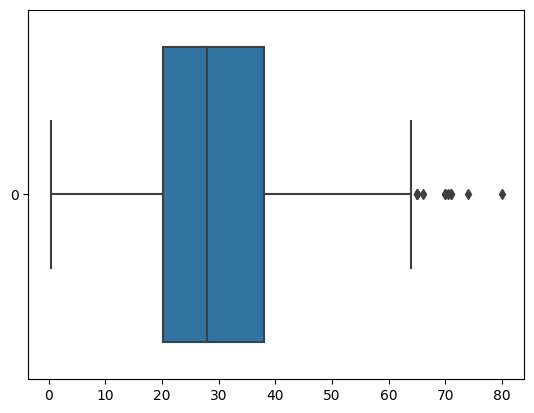

In [6]:
ax = sns.boxplot(data=train_data.Age, orient='h')
ax

In [9]:
import matplotlib.pyplot as plt

In [10]:
#removing outliers
age = train_data.Age

In [11]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [12]:
Q1 = age.quantile(.25)
Q3 = age.quantile(.75)
IIQ = Q3 - Q1
lower_limit = Q1 - 1.5*IIQ
upper_limit = Q3 + 1.5*IIQ

selection = (age >= lower_limit) & (age <= upper_limit)
new_train_data = train_data[selection]

<Axes: >

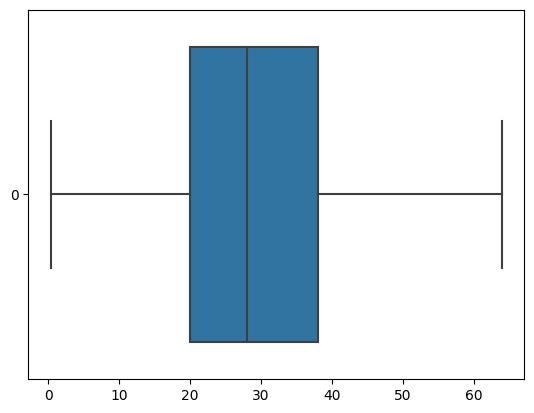

In [16]:
ax = sns.boxplot(data=new_train_data.Age, orient='h')
ax

In [18]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  703 non-null    int64  
 1   Survived     703 non-null    int64  
 2   Pclass       703 non-null    int64  
 3   Name         703 non-null    object 
 4   Sex          703 non-null    object 
 5   Age          703 non-null    float64
 6   SibSp        703 non-null    int64  
 7   Parch        703 non-null    int64  
 8   Ticket       703 non-null    object 
 9   Fare         703 non-null    float64
 10  Cabin        180 non-null    object 
 11  Embarked     701 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 87.6+ KB


In [21]:
new_train_data['Cabin'] = new_train_data['Cabin'].fillna(0)

/tmp/ipykernel_32/657066631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['Cabin'] = new_train_data['Cabin'].fillna(0)


In [11]:
train_data['Embarked'] = train_data['Embarked'].fillna(method = 'ffill')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,C


<Axes: xlabel='Age', ylabel='Survived'>

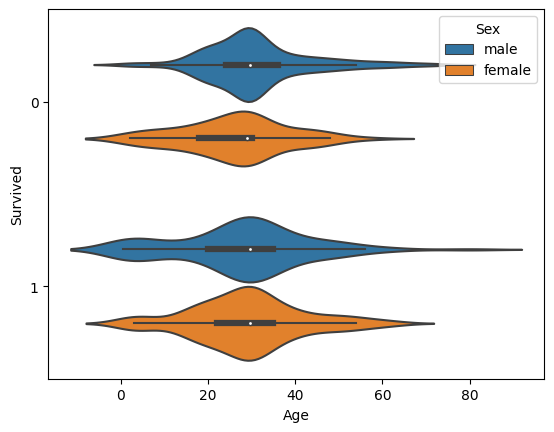

In [14]:
#violin

ax = sns.violinplot(data = train_data, x = "Age", y = "Survived", hue = "Sex", orient = 'h')
ax

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


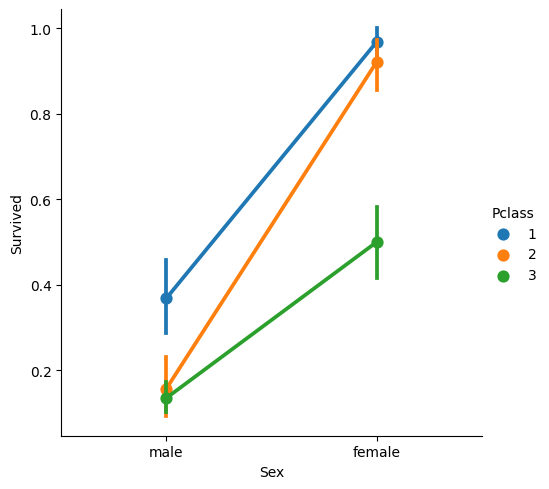

In [15]:
#catplot

ax = sns.catplot(data=train_data, x="Sex", y="Survived", hue="Pclass", kind = 'point')
ax

## O que podemos concluir:

- Pessoas de classes mais elevadas tem maior chance de terem sobrevivido
- Mulheres tem mais chance de terem sobrevivido
- Crianças tem mais chance de terem sobrevivido

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

features = train_data[["Age", "Pclass", "Sex", "Fare", "SibSp", "Parch"]]
X = pd.get_dummies(features)
y = train_data["Survived"]

SEED = 301
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, stratify=y)
print("Training with %d elements and testing with %d elements." % (len(train_x), len(test_x)))

Training with 623 elements and testing with 268 elements.


In [32]:
#dummy classifier

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y) * 100

print("Dummy classifier accuracy was %.2f%%" % accuracy)


Dummy classifier accuracy was 61.57%


In [33]:
#decision tree classifier

from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=5)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, previsions) * 100
print("Decision Tree Classifier accuracy: %.2f%%" % accuracy)

Decision Tree Classifier accuracy: 82.09%


In [25]:
#cross validate

from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=5)
results = cross_validate(model, X, y, cv = 5, return_train_score= False)
mean = results['test_score'].mean()
std_dev = results['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f, %.2f]" % ((mean - 2 * std_dev) * 100, (mean + 2 * std_dev) * 100))

Accuracy with cross validation, 5 = [75.44, 86.85]


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(method = 'ffill')

In [39]:
#model

features_test = test_data[["Age", "Pclass", "Sex", "Fare", "SibSp", "Parch"]]
X_test = pd.get_dummies(features_test)

model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
    